# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent? 
<ul>
       <b/> The sample size is 130 individuals. It is not a really significant result for a scientific argument. CLT theory that it's enough due to the range in variation being limited and 130>30. The observations are independent. </b> 
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
            <li>
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <ul>
        <b/>     A two sample test would work to compare the male and female temperature results, and see how their variation/mean compares. A one sample test is a better choice to test against a standard and identify the value of the data set. For the question in this problem I would say a one-sample is a better solution.  </b>
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <ul>
     <b/> Either can be used in this example. There are enough samples to make STD usabel, so Z-test is valid. a T-test (either 1 way or 2 way) is used to measure how two populations compare to each other- or one to a normal distrubution (for example). For the overarching question: i.e. if this sample shows a different average then previously identified I would use the z-test to identify if this is a good standerd and find the mean. </b> 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [105]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Esme\Desktop\Springboard\Lesson_8_Jupyter_Human_Temp\8_2_1_lesson_stuff\human_temp\data\human_body_temperature.csv')


In [134]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [107]:
# look at data and columns
print(df.head())
df.info()

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


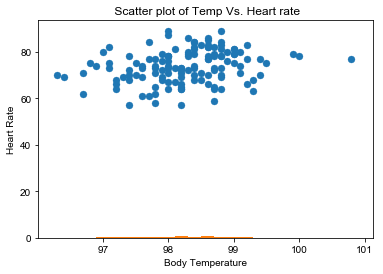

In [109]:
temperature = df.temperature
heart_rate = df.heart_rate

# initial Exploratory visualization to look at the data trend
_= plt.scatter(temperature , heart_rate, data = df_temp )
_= plt.xlabel('Body Temperature')
_= plt.ylabel('Heart Rate')
_= plt.title(' Scatter plot of Temp Vs. Heart rate')
plt.show()

In [128]:
mean_temp = np.mean( temperature)
mean_heart_rate = np.mean(heart_rate)
var_temp= np.var(temperature)
std_temp= np.std(temperature)                    
                          
print("Sample mean for temp is:", + np.mean( temperature))
print ("Sample variance for temp is:", + np.var(temperature))
print ("Sample STD for temp is:", + np.std(temperature))

print ("Sample mean for heart rate is:", + np.mean(heart_rate))                   

Sample mean for temp is: 98.24923076923078
Sample variance for temp is: 0.5334224852071
Sample STD for temp is: 0.7303577789050377
Sample mean for heart rate is: 73.76153846153846


1) is this a normal distribution:
 It looks like from the graph below that the body temperature data in our sample follows normal distribution fairly well
 plotted historgram under normal distribution curve of the results

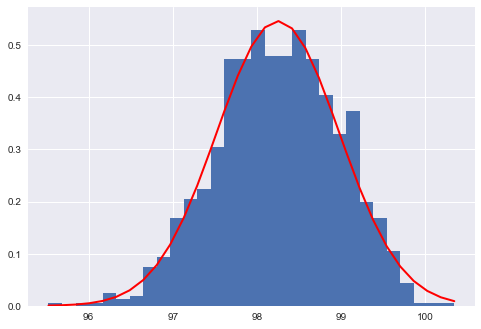

In [126]:
mu = mean_temp
var = var_temp
sigma = np.sqrt(var)
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
plt.show()

3)  Is the true population mean really 98.6 degrees F?
    <li> Would you use a one-sample or two-sample test? Why?
    <ul>
        <b/>     A two sample test would work to compare the male and female temperature results, and see how their variation/mean compares. A one sample test is a better choice to test against a standard and identify the value of the data set. For the question in this problem I would say a one-sample is a better solution.  </b>
        
   The null hypothesis is that the mean of temperature data is 98.6 degrees F. 
 H0: mu = 98.6
 H1: mu =/ 98.6
 
 with a p value of .05 an example 2 sided test:


In [137]:
n = len(temperature)
SE = std_temp / np.sqrt(n)
print ('Std Error:', SE)

z_temp = (mean_temp - 98.6) / SE
print ('Z value is: ', z_temp)

p_temp_2_sided = stats.norm.sf(abs(z_temp))*2
print ('p-value is: ', p_temp_2_sided)

Std Error: 0.0640566146952
Z value is:  -5.47592520208
p-value is:  4.35231516588e-08


Therefore a statistically significant P value to reject the null hypothesis: i.e. our reasults confirm that 98.6 is not the mean body temperature from our sample. 

In this situation, is it appropriate to use the  tt  or  zz  statistic?
Either can be used in this example. There are enough samples to make STD usabel, so Z-test is valid. a T-test (either 1 way or 2 way) is used to measure how two populations compare to each other- or one to a normal distrubution (for example). For the overarching question: i.e. if this sample shows a different average then previously identified I would use the z-test to identify if this is a good standerd and find the mean.
 And did. Above. :)

Now try using the other test. How is the result be different? Why?


In [138]:
stats.ttest_1samp(temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The exact values were slightly different (-5.47 +/ -5.45 and 2.41...e-07 =/ 4.35...e-08, respectively) Although the final analysis would be the same. i.e. reject null hypothesis therefore the mean is not 98.6

4) Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>

In [148]:
# Used ECDF code from DataCamp exercise to make a 10 sample bootstrap sample from our origional sample 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

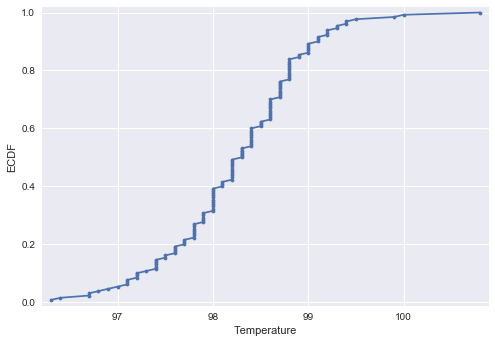

In [144]:
for i in range(10):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(temperature, size=10)

    # Compute and plot ECDF from bootstrap sample
    x_bs, y_bs = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)
    

# Compute and plot ECDF from original data
x, y = ecdf(temperature)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [145]:
print (bs_sample)

[ 98.6  99.2  98.4  98.   99.3  98.9  98.8  98.6  98.8  98.4]


Repeat t-Test and z_test above with bs_sample

In [147]:
n_bs = len(bs_sample)
SE_bs = np.std(bs_sample) / np.sqrt(n_bs)
print ('Std Error Boot Strap Sample:', SE)

z_temp_bs = (np.mean(bs_sample) - 98.6) / SE_bs
print ('Boot Strap Sample Z value is: ', z_temp_bs)

p_temp_2_sided_bs = stats.norm.sf(abs(z_temp_bs))*2
print ('p-value is: ', p_temp_2_sided_bs)

bs_t_test= stats.ttest_1samp(bs_sample, 98.6)

print ('T test Boot Strap Sample results are: ', bs_t_test)

Std Error Boot Strap Sample: 0.0640566146952
Boot Strap Sample Z value is:  0.857492925712
p-value is:  0.39117252281
T test Boot Strap Sample results are:  Ttest_1sampResult(statistic=0.81348921681991559, pvalue=0.43692928977145418)


Despite being based on the same data the lack of variation in results gives a very different value the p-value is much higher for both tests(>0.05) and the null hypothesis has to be accepted 

 5) Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

To test this question we need to seperate the M results from the Gender column and F results. 
Then consider the null hypothesis (H0) that the averages are the same
and test hypothesis (H1) that the averages are not the same. Again significance level of 0.05 p value

In [158]:
mean_male = df[df.gender == 'M'].temperature.mean()
mean_female = df[df.gender =='F'].temperature.mean()
var_male = df[df.gender =='M'].temperature.var()
n_male = len(df[df.gender == 'M'].temperature)
n_female = len(df[df.gender == 'F'].temperature)
var_female = df[df.gender =='F'].temperature.var()
SE_gender = np.sqrt(var_male/n_male + var_female/n_female)
print ('Standard error is: ', SE_gender)


z_gender = (mean_male - mean_female - 0) / SE_gender
print ('The z score is: ', z_gender)
p_value_gender = stats.norm.sf(abs(z_gender))*2
print ('The p-value is: ', p_value_gender)

print( 'Male temperature average is:', mean_male)
print('Female temperature average is:', mean_female)

Standard error is:  0.12655395042
The z score is:  -2.28543453817
The p-value is:  0.0222873607607
Male temperature average is: 98.1046153846154
Female temperature average is: 98.39384615384613


We reject the null hypothesis and accept the test hypothesis that they are different! Alrighty then

